#Mushroom Classification

Project Introduction:

Problem:
"Mushrooms can either be edible or poisonous. Accurately distinguishing between these two categories based on physical features is critical for public health and safety."

Objective:
"The objective of this project is to build a machine learning classification model that predicts whether a given mushroom is edible or poisonous, based on features such as cap shape, color, odor, and more."

Dataset:
"The dataset used for this classification task consists of 8,124 samples of 23 different mushroom species with 22 features, including both categorical attributes like cap-shape, odor, and gill-color."


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('mush.csv')
df

,Poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Short Explanation for the Alphabetic Representations in the Dataset

cap-shape: The shape of the mushroom's cap.
b = bell, c = conical, x = convex, f = flat, k = knobbed, s = sunken

cap-surface: The texture of the mushroom's cap.
f = fibrous, g = grooves, y = scaly, s = smooth

cap-color: The color of the mushroom's cap.
n = brown, b = buff, c = cinnamon, g = gray, r = green, p = pink, u = purple, e = red, w = white, y = yellow

bruises: Whether the mushroom bruises when touched.
t = bruises, f = does not bruise

odor: The smell of the mushroom.
a = almond, l = anise, c = creosote, y = fishy, f = foul, m = musty, n = none, p = pungent, s = spicy

gill-attachment: How the gills are attached to the stem.
a = attached, d = descending, f = free, n = notched

gill-spacing: The spacing between the gills.
c = close, w = crowded, d = distant

gill-size: The width of the gills.
b = broad, n = narrow

gill-color: The color of the mushroom's gills.
k = black, n = brown, b = buff, h = chocolate, g = gray, r = green, o = orange, p = pink, u = purple, e = red, w = white, y = yellow

stalk-shape: The shape of the mushroom's stalk.
e = enlarging, t = tapering

stalk-root: The type of root the stalk has.
b = bulbous, c = club, u = cup, e = equal, z = rhizomorphs, r = rooted, ? = missing (null value)

stalk-surface-above-ring: The texture of the mushroom's stalk above the ring.
f = fibrous, y = scaly, k = silky, s = smooth

stalk-surface-below-ring: The texture of the mushroom's stalk below the ring.
f = fibrous, y = scaly, k = silky, s = smooth

stalk-color-above-ring: The color of the mushroom's stalk above the ring.
n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow

stalk-color-below-ring: The color of the mushroom's stalk below the ring.
n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow

veil-type: The type of veil covering the mushroom's cap.
p = partial, u = universal

veil-color: The color of the mushroom's veil.
n = brown, o = orange, w = white, y = yellow

ring-number: The number of rings on the stalk.
n = none, o = one, t = two

ring-type: The type of ring on the stalk.
c = cobwebby, e = evanescent, f = flaring, l = large, n = none, p = pendant, s = sheathing, z = zone

spore-print-color: The color of the mushroom's spore print.
k = black, n = brown, b = buff, h = chocolate, r = green, o = orange, u = purple, w = white, y = yellow

population: The density of the mushroom population.
a = abundant, c = clustered, n = numerous, s = scattered, v = several, y = solitary

habitat: The environment where the mushroom is found.
g = grasses, l = leaves, m = meadows, p = paths, u = urban, w = waste, d = woods

poisonous: Whether the mushroom is poisonous or not.
e = edible, p = poisonous

This is a general overview of what the different alphabetic codes in the dataset represent. Each column in the dataset contains categorical data where each letter corresponds to a different characteristic or category.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [27]:
df.duplicated().sum()

0

In [25]:
df.describe()

,Poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [29]:
df.shape

(8124, 23)

In [7]:
df.isnull().sum()

Poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
df['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

#Handling missing values in stalk-root column, here missing values are represented as '?'.

In [39]:
import numpy as np

# Get value counts and probabilities, excluding `?`
value_counts = df['stalk-root'].value_counts()

# Drop the `?` value and normalize the remaining counts to get probabilities
value_counts = value_counts.drop('?')
probabilities = value_counts / value_counts.sum()

# Find the indices of the rows where 'stalk-root' is '?'
missing_indices = df[df['stalk-root'] == '?'].index

# Replace `?` values with random choices based on the probabilities
df.loc[missing_indices, 'stalk-root'] = np.random.choice(
    value_counts.index, 
    size=len(missing_indices), 
    p=probabilities
)


In [41]:
df['stalk-root'].value_counts()

stalk-root
b    5449
e    1604
c     806
r     265
Name: count, dtype: int64

Handling Missing Values in stalk-root Column:

The stalk-root column had 2,480 missing values. To address this, we imputed the missing values by randomly assigning one of the existing categories (b, e, c, r) based on their proportions in the dataset. This ensures that the imputed values maintain the same distribution as the observed data, preserving the integrity of the feature.


In [45]:
df['stalk-root'].count()

8124

#Checking the Ratio of poisonous Column:

In [52]:
# Calculate the count and ratio of 'p' and 'e' in the target column
target_counts = df['Poisonous'].value_counts()
target_ratio = target_counts/target_counts.sum()

print('counts:')
print(target_counts)
print('ratios')
print(target_ratio)


counts:
Poisonous
e    4208
p    3916
Name: count, dtype: int64
ratios
Poisonous
e    0.517971
p    0.482029
Name: count, dtype: float64


Checking the Ratio of poisonous Column:

The dataset contains 4,208 edible (e) and 3,916 poisonous (p) samples. The class distribution is approximately 51.8% edible and 48.2% poisonous. The target variable is fairly balanced, which reduces the risk of bias in model training.

#Bar plots

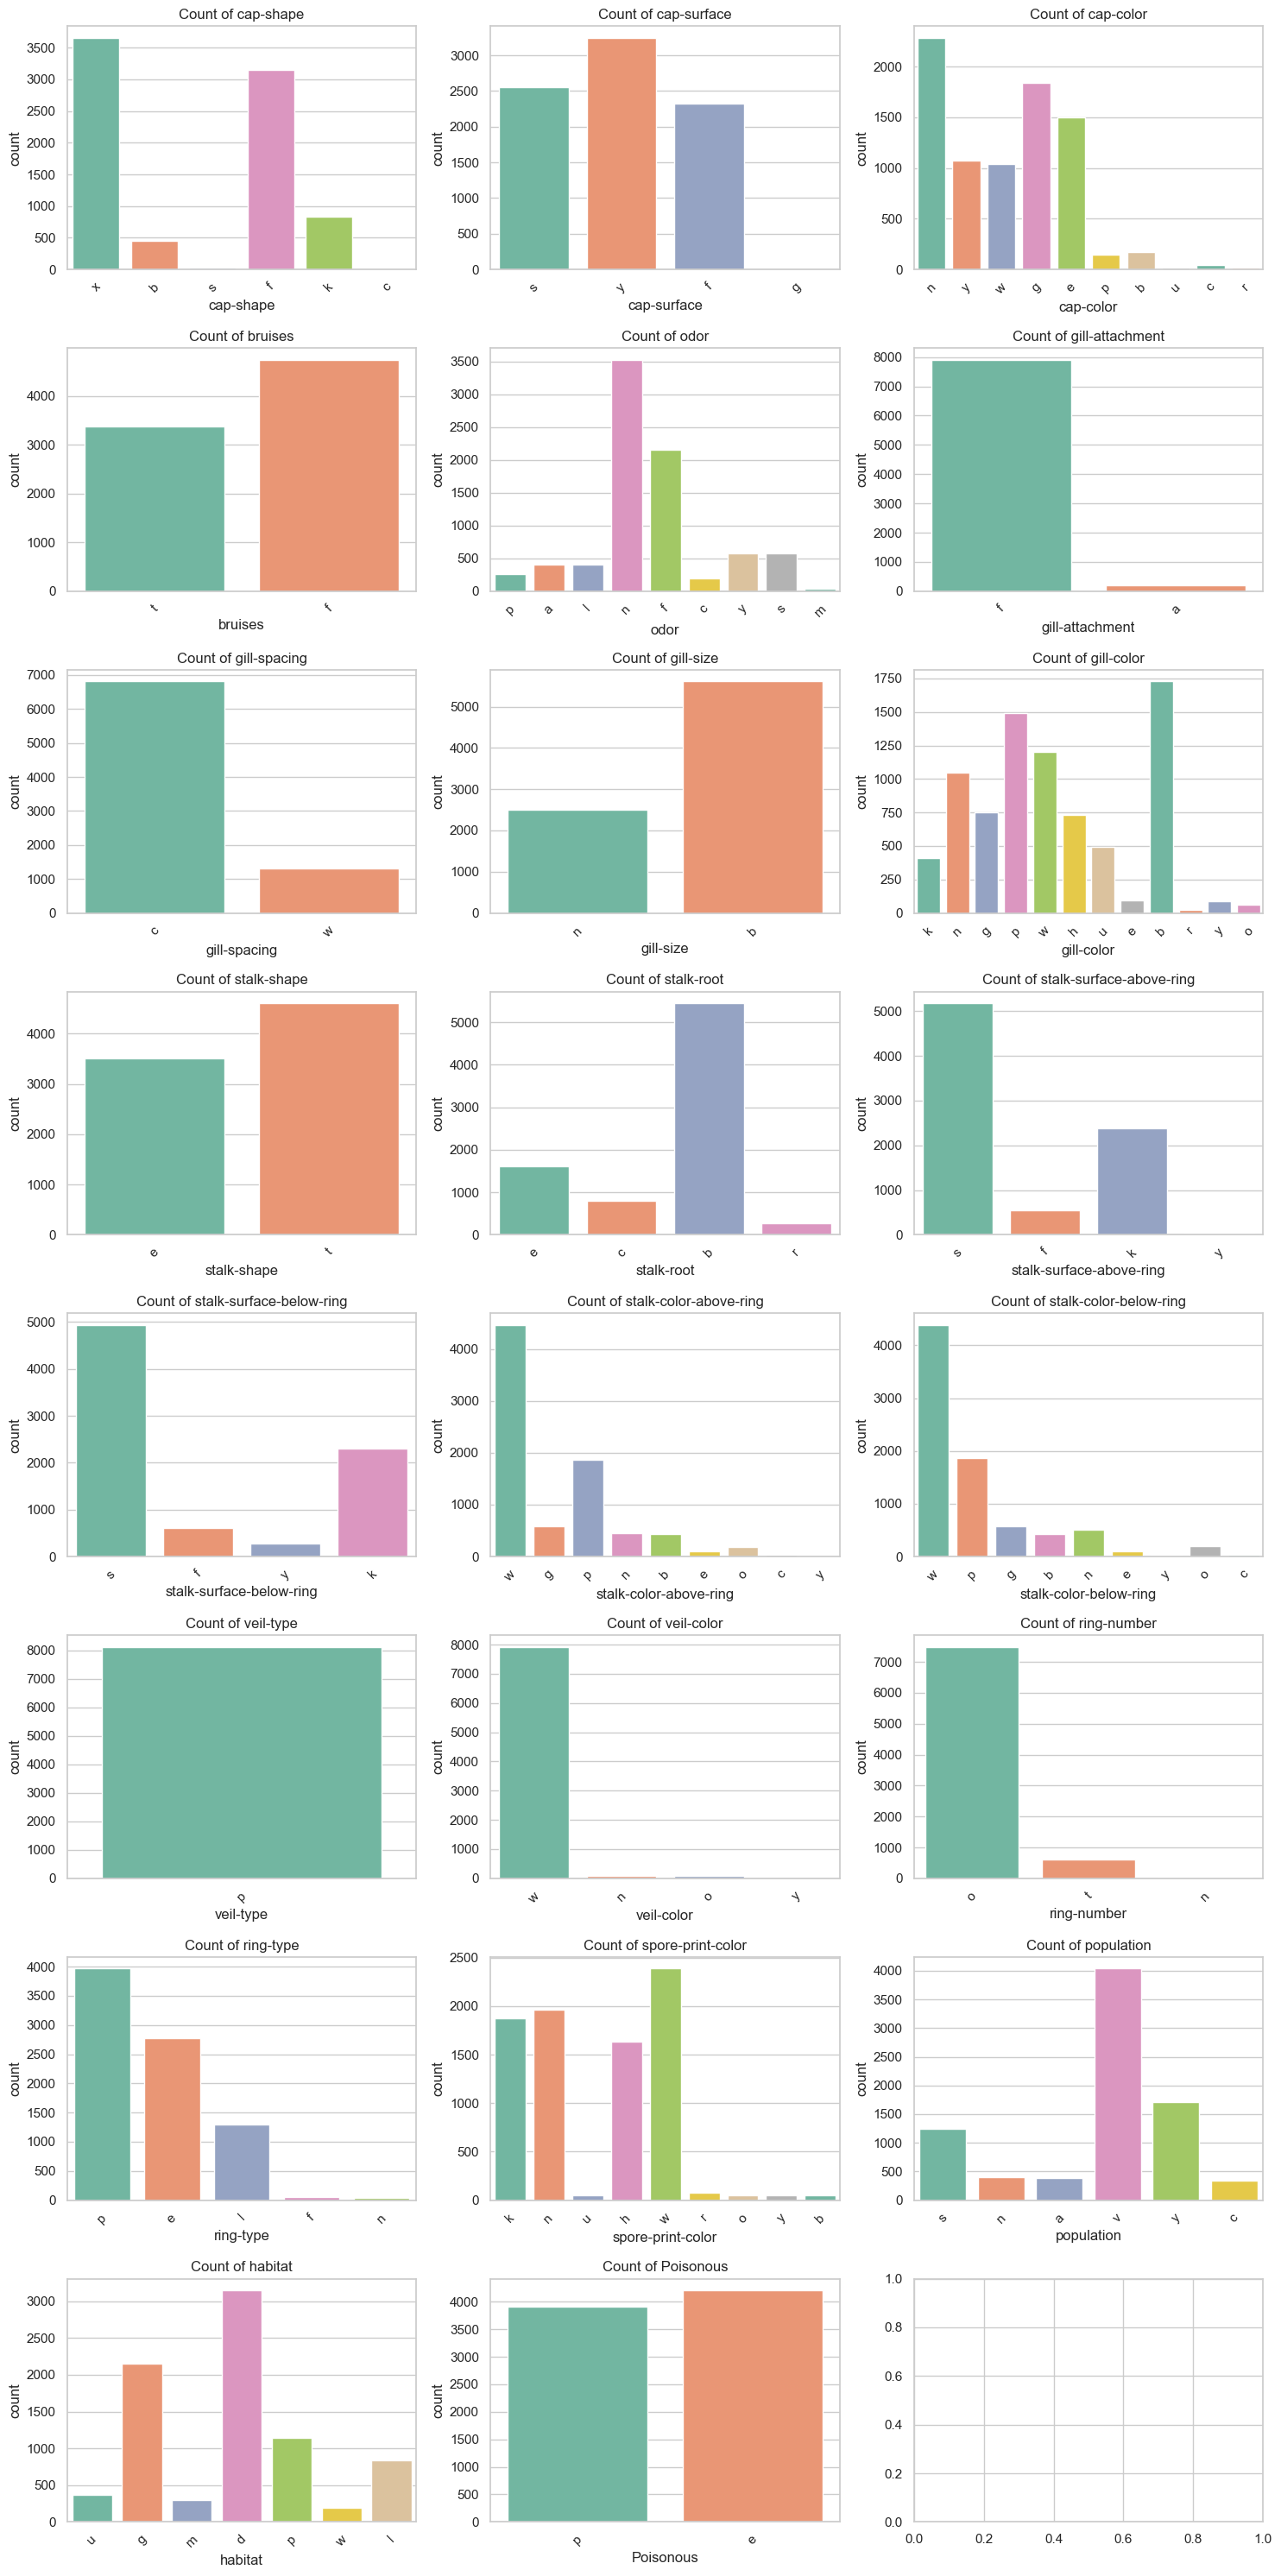

In [58]:
# Set up the visual style
sns.set(style="whitegrid")

# List of columns to plot bar charts for
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
                       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
                       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
                       'stalk-surface-below-ring', 'stalk-color-above-ring', 
                       'stalk-color-below-ring', 'veil-type', 'veil-color', 
                       'ring-number', 'ring-type', 'spore-print-color', 
                       'population', 'habitat', 'Poisonous']

# Create subplots with enough rows and columns for 22 categories
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 30))
axes = axes.flatten()

# Plot bar plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


#. Distribution of Poisonous vs. Edible (Pie Chart)

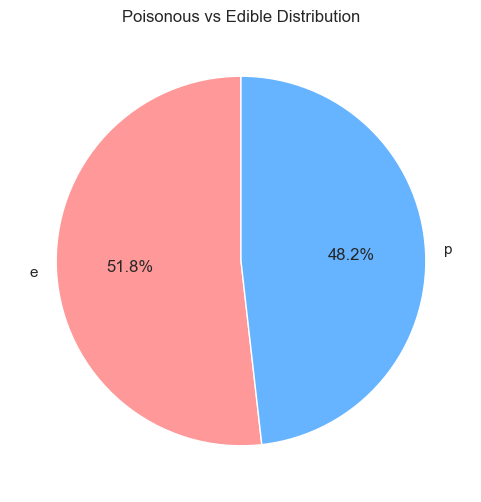

In [62]:
plt.figure(figsize=(6, 6))
df['Poisonous'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Poisonous vs Edible Distribution')
plt.ylabel('')
plt.show()


#Cross-Tabulation

In [66]:
pd.crosstab(df['odor'], df['Poisonous'])


Poisonous,e,p
odor,,
a,400,0
c,0,192
f,0,2160
l,400,0
m,0,36
n,3408,120
p,0,256
s,0,576
y,0,576


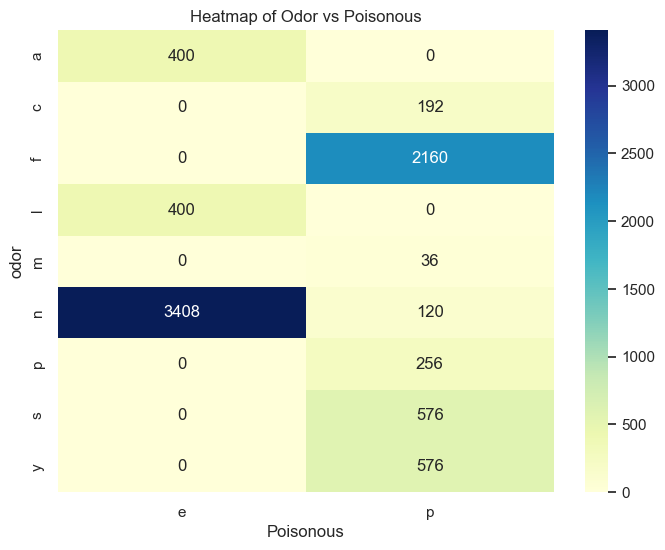

In [70]:
crosstab = pd.crosstab(df['odor'], df['Poisonous'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of Odor vs Poisonous')
plt.show()


#Stacked Bar Chart
A stacked bar chart can show the breakdown of a variable (e.g., how cap-shape is distributed for edible vs poisonous mushrooms)

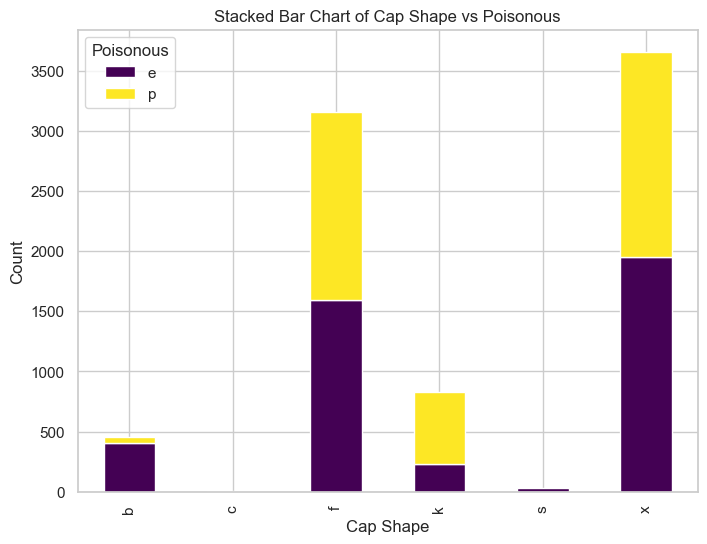

In [72]:
crosstab = pd.crosstab(df['cap-shape'], df['Poisonous'])
crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")
plt.title('Stacked Bar Chart of Cap Shape vs Poisonous')
plt.ylabel('Count')
plt.xlabel('Cap Shape')
plt.show()


C:\Users\abhiw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


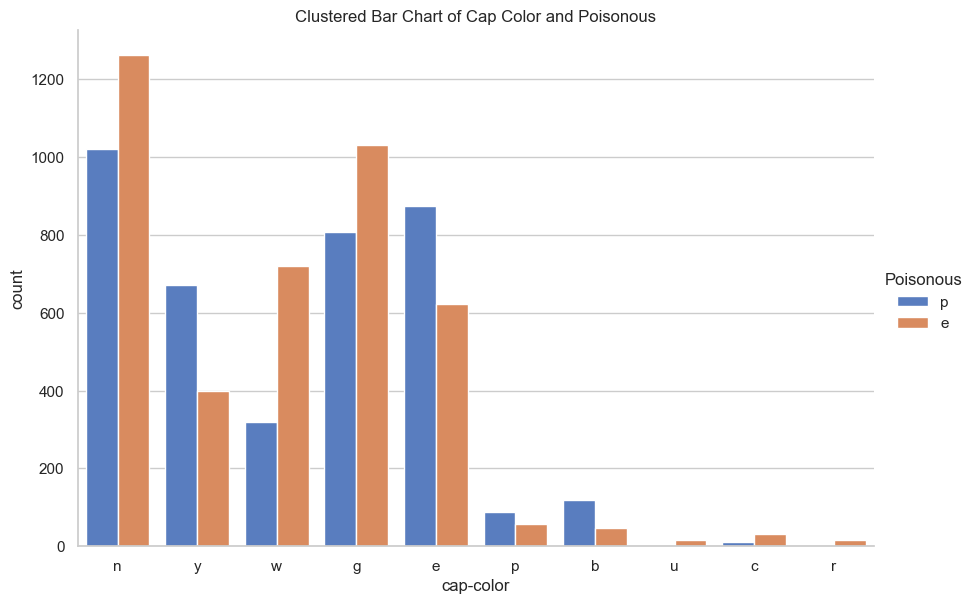

In [74]:
sns.catplot(data=df, x='cap-color', hue='Poisonous', kind='count', height=6, aspect=1.5, palette="muted")
plt.title('Clustered Bar Chart of Cap Color and Poisonous')
plt.show()


In [92]:
df1 = df.copy()

In [86]:
#Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder

In [90]:
Le = LabelEncoder()

In [96]:
encoded_features = df1.drop(columns='Poisonous').apply(Le.fit_transform)

df1['Poisonous'] = Le.fit_transform(df1['Poisonous'])

df_encoded = encoded_features.copy()
df_encoded['Poisonous']=df1['Poisonous']

In [98]:
df_encoded.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [116]:
#Splitting the data

In [100]:
from sklearn.model_selection import train_test_split

In [102]:
X = df_encoded.drop('Poisonous', axis=1)
y = df_encoded['Poisonous']

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6499, 22) (1625, 22) (6499,) (1625,)


In [114]:
#Feature selection

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=chi2,k=15)

X_train_selected = selector.fit_transform(X_train,y_train)

score = selector.scores_

feature_scores = pd.DataFrame({
    'features': X_train.columns,
    'scores': score
})
    

In [126]:
# Sort the features by their scores in ascending order
sorted_feature_scores = feature_scores.sort_values(by='scores', ascending=True)

# Print the sorted feature scores
print(sorted_feature_scores)


                    features       scores
5            gill-attachment     2.673958
16                veil-color     4.253835
2                  cap-color     8.580088
0                  cap-shape     9.987540
17               ring-number    21.950072
9                stalk-shape    27.422269
4                       odor    65.195901
14    stalk-color-below-ring    86.742060
13    stalk-color-above-ring    93.987470
12  stalk-surface-below-ring   166.694012
1                cap-surface   171.540853
11  stalk-surface-above-ring   179.147948
20                population   259.066427
10                stalk-root   311.981205
19         spore-print-color   322.699781
21                   habitat   592.010643
6               gill-spacing   649.878766
3                    bruises   970.872616
7                  gill-size  1354.660167
18                 ring-type  1560.256860
8                 gill-color  4791.309221
15                 veil-type          NaN


In [128]:
# Drop rows where the score is NaN
sorted_feature_scores = sorted_feature_scores.dropna()

# Print the sorted feature scores
print(sorted_feature_scores)


                    features       scores
5            gill-attachment     2.673958
16                veil-color     4.253835
2                  cap-color     8.580088
0                  cap-shape     9.987540
17               ring-number    21.950072
9                stalk-shape    27.422269
4                       odor    65.195901
14    stalk-color-below-ring    86.742060
13    stalk-color-above-ring    93.987470
12  stalk-surface-below-ring   166.694012
1                cap-surface   171.540853
11  stalk-surface-above-ring   179.147948
20                population   259.066427
10                stalk-root   311.981205
19         spore-print-color   322.699781
21                   habitat   592.010643
6               gill-spacing   649.878766
3                    bruises   970.872616
7                  gill-size  1354.660167
18                 ring-type  1560.256860
8                 gill-color  4791.309221
